In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
### 1. DATOS TAGS TODO
TAGS_USAR = pd.read_csv('/content/gdrive/MyDrive/Datos_TAGS/Datasets/Final/TAGS_USAR.csv')

<ipython-input-125-50bc78ffff5e>:2: DtypeWarning: Columns (5,21,22,41,44,45,52,53,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  TAGS_USAR = pd.read_csv('/content/gdrive/MyDrive/Datos_TAGS/Datasets/Final/TAGS_USAR.csv')


Cosas:
    Dimensión del dataset. Indica cantidad de registros y columnas
    Describe claramente cada una de las variables, incluyendo su nombre, descripción, tipo (categórico/Numérico) y valores posibles que puede tomar, valores nulos.
    Exploración de datos:

        Calcula medidas estadísticas
             Variables cuantitativas
                Medidas de tendencia central: promedio, media, mediana y moda de los datos.
                Medidas de dispersión: rango: máximo - mínimo, varianza, desviación estándar.

            Variables cualitativas
                Tabla de distribución de frecuencia
                Mediana (escala ordinal)
        Explora los datos usando herramientas de visualización
            Variables cuantitativas:
                Medidas de posición no-central: cuartiles, outlier (valores atípicos), boxplots
                Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica
                Análisis de correlación  de los datos, mapa de calor

            Variables categóricas
                Distribución de los datos (diagramas de barras, diagramas de pastel)

2) Verifica la calidad de los datos:

a) Detecta valores faltantes, erróneos, duplicados, errores de escritura
b) Corrige valores érroneos que no hayas detectado cuando limpiaste los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = TAGS_USAR


In [ ]:
df

,Month,Id Grupo Región,Grupo de Región,Cliente,Factura,PO,GR,Id Región,Serie,No Economico,...,Respuesta,Año,Importe Neto,IVA,Estado,BL 2,VIN Number,Locacion,No. Economico,Sub BL
0,Enero,2,MCA2,02125-031,TCGE000003146706,PENDIENTE,PENDIENTE,1000,1FTMF1CB6NKE14608,993-VH,...,,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Diciembre,ene-00,MCA2,02125-031,TCGE000003611447,4793681915,NaN,sep-02,3N6CD33BXPK837919,123-REY,...,R,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Enero,2,MCA2,02125-031,TCGE000003146706,PENDIENTE,PENDIENTE,1000,1FTFW1CD5NFB41759,927-VH,...,,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Enero,2,MCA2,02125-031,TCGE000003142973,PENDIENTE,PENDIENTE,1003,1FTMF1CB8PKD69206,120-VH,...,,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Enero,2,MCA2,02125-031,TCGE000003144894,PENDIENTE,PENDIENTE,1001,1FMCU0BZ0MUA90533,875-VH,...,,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48764,Diciembre,12,NaN,MCA2,02125-031,NaN,NaN,TCGE000002205827,1FTEX1CMXDKD62983,NaN,...,,2021,850.67,132.58,Tabasco,NaN,NaN,2,1700-VH,CFLC
48765,Diciembre,12,NaN,Marine,02125-021,NaN,NaN,Pendiente,Equipment,NaN,...,,2021,7816.13,1225.56,Tabasco,NaN,NaN,DOWELL,Equipment,WIS
48766,Diciembre,12,NaN,Marine,02125-021,NaN,NaN,Pendiente,Equipment,NaN,...,,2021,5149.40,807.28,Tabasco,NaN,NaN,DOWELL,Equipment,WIS
48767,Diciembre,12,NaN,Marine,02125-021,NaN,NaN,Pendiente,km14.5,NaN,...,,2021,3919.00,611.21,Tabasco,NaN,NaN,DOWELL,km14.5,SBS


## Parte 1. Dimensión y descripcion de variables

###1.1. Dimension de dataset

In [ ]:
# Número de registros y columnas
print("Dimensiones del dataset (filas, columnas):", df.shape)


Dimensiones del dataset (filas, columnas): (48769, 57)


###1.2. Descripcion de cada variable

In [ ]:
# Información general del DataFrame
print(df.info())

# Valores únicos y nulos por cada columna
unique_vals = df.nunique()
nulos = df.isnull().sum()
descripcion = pd.DataFrame({'Tipo': df.dtypes, 'Valores Únicos': unique_vals, 'Valores Nulos': nulos})
print(descripcion)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48769 entries, 0 to 48768
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   48769 non-null  object 
 1   Id Grupo Región         48764 non-null  object 
 2   Grupo de Región         35227 non-null  object 
 3   Cliente                 48769 non-null  object 
 4   Factura                 48769 non-null  object 
 5   PO                      35227 non-null  object 
 6   GR                      32175 non-null  object 
 7   Id Región               48764 non-null  object 
 8   Serie                   48769 non-null  object 
 9   No Economico            35219 non-null  object 
 10  Division                48769 non-null  object 
 11  BL                      48769 non-null  object 
 12  SUB BL                  35227 non-null  object 
 13  CC                      35227 non-null  object 
 14  Identificador Vehículo  48769 non-null

## Parte 2. Exploración de datos

###2.1. Variables cuantitativas

#### 2.1.1. Medidas estadisticas basicas (Promedio, Desviación estandar, Valor minimo)

In [ ]:
# Análisis estadístico de variables cuantitativas
estadisticas = df.describe()
print(estadisticas)


        Num Tarjeta  Km Ant Transacción  Km Transacción     Recorrido  \
count  4.876900e+04        4.825300e+04    4.876600e+04  4.825100e+04   
mean   6.363180e+15        1.422383e+05    1.441313e+05  2.548682e+03   
std    3.547979e+06        4.498898e+05    4.581357e+05  1.924149e+05   
min    6.363180e+15        0.000000e+00    0.000000e+00 -9.750948e+06   
25%    6.363180e+15        4.063700e+04    4.082525e+04  1.570000e+02   
50%    6.363180e+15        8.677500e+04    8.696050e+04  2.850000e+02   
75%    6.363180e+15        1.353200e+05    1.356498e+05  4.460000e+02   
max    6.363180e+15        9.850034e+06    9.850034e+06  9.751982e+06   

         IVA %          IEPS  Importe Transacción      Comision      Subtotal  \
count  48769.0  48769.000000         48769.000000  48769.000000  48769.000000   
mean      16.0     42.593795          2058.046762     16.924773   1887.796655   
std        0.0     42.198036          2441.280579     20.021931   2239.771044   
min       16.0    

#### 2.1.2. Mediana y moda

In [ ]:
# Mediana de cada variable numérica
mediana = df.median(numeric_only=True)
print("Mediana:\n", mediana)

# Moda de cada variable numérica
moda = df.mode().iloc[0]
print("Moda:\n", moda)


Mediana:
 Num Tarjeta            6.363180e+15
Km Ant Transacción     8.677500e+04
Km Transacción         8.696050e+04
Recorrido              2.850000e+02
IVA %                  1.600000e+01
IEPS                   3.206000e+01
Importe Transacción    1.403350e+03
Comision               1.156000e+01
Subtotal               1.281520e+03
Cantidad Mercancía     6.561000e+01
KG C02                 1.575800e+02
TON C02                1.600000e-01
Arboles                1.049000e+01
Precio Unitario        2.186000e+01
Rendimiento            1.400000e+01
Rendimiento Real       4.960000e+00
Id Conductor           4.082145e+06
Año                    2.022000e+03
Importe Neto           1.240020e+03
IVA                    1.728000e+02
dtype: float64
Moda:
 Month                                                    Agosto
Id Grupo Región                                               2
Grupo de Región                                            MCA2
Cliente                                               02

<ipython-input-142-c176a20a8e8f>:6: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  moda = df.mode().iloc[0]


####2.1.3. Medidas de dispersión

In [ ]:
# Ejemplo para la variable 'Importe Transacción'
col = 'Importe Transacción'
rango = df[col].max() - df[col].min()
varianza = df[col].var()
desv_estandar = df[col].std()

print(f"Variable: {col}")
print("Rango (max - min):", rango)
print("Varianza:", varianza)
print("Desviación Estándar:", desv_estandar)


Variable: Importe Transacción
Rango (max - min): 24320.9
Varianza: 5959850.866221736
Desviación Estándar: 2441.280579167773


####2.1.4. Visualizacion Variables numericas

##### 2.1.4.1. Boxplots y outliers

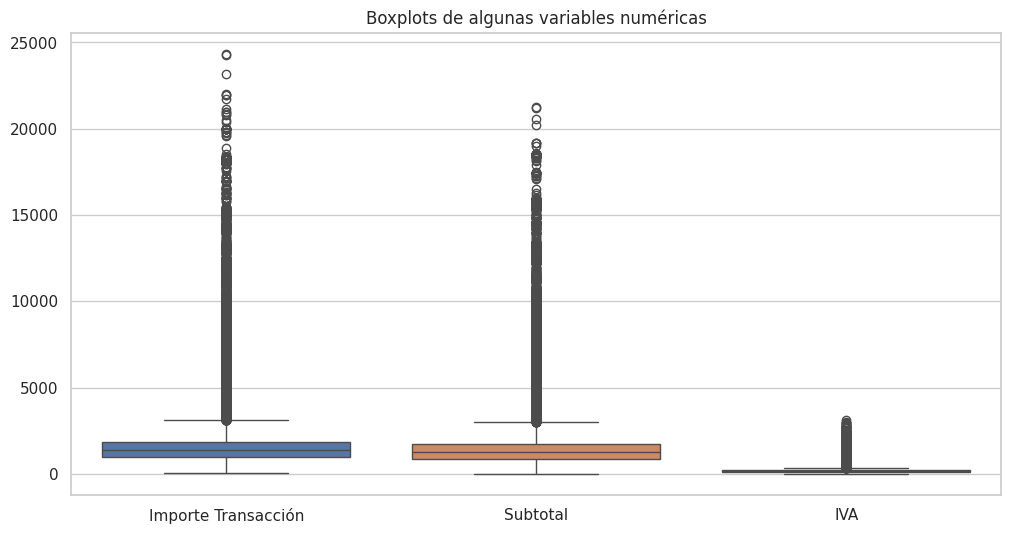

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Importe Transacción', 'Subtotal', 'IVA']])
plt.title('Boxplots de algunas variables numéricas')
plt.show()


##### 2.1.4.2. Histogramas y distribucion

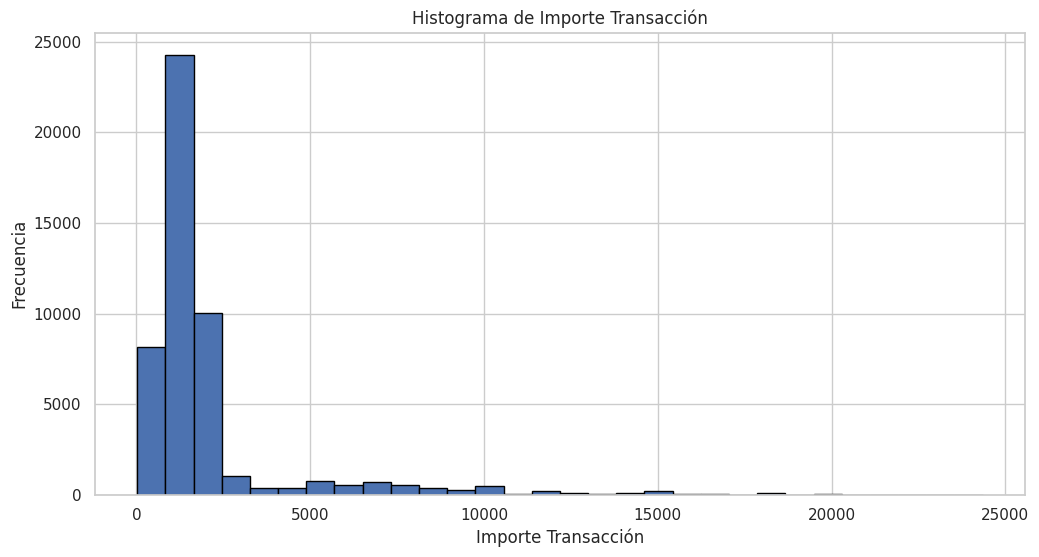

In [ ]:
plt.figure(figsize=(12, 6))
df['Importe Transacción'].hist(bins=30, edgecolor='black')
plt.xlabel('Importe Transacción')
plt.ylabel('Frecuencia')
plt.title('Histograma de Importe Transacción')
plt.show()


##### 2.1.4.3. Heatmap correlación

### 2.2. Variables cualitativas

#### 2.2.1 Distribucion de frecuencia

In [ ]:
# Tabla de frecuencia para 'Month'
frecuencia_month = df['Month'].value_counts()
print("Frecuencia de 'Month':\n", frecuencia_month)

# Tabla de frecuencia para 'Estado'
frecuencia_estado = df['Estado'].value_counts()
print("Frecuencia de 'Estado':\n", frecuencia_estado)


Frecuencia de 'Month':
 Month
Agosto        4436
Mayo          4291
Marzo         4239
Julio         4226
Enero         4151
Septiembre    4121
Octubre       4106
Noviembre     4081
Abril         3956
Junio         3913
Febrero       3626
Diciembre     3623
Name: count, dtype: int64
Frecuencia de 'Estado':
 Estado
Tabasco       21752
Veracruz      11211
Tamaulipas     6284
Campeche        306
Cd Mexico       280
Name: count, dtype: int64


#### 2.2.1

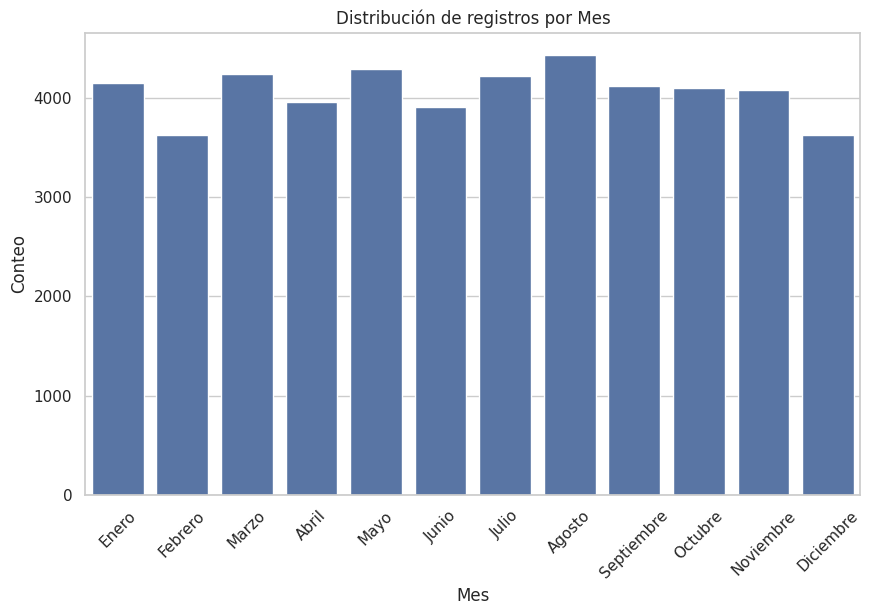

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, order=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo',
                                           'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre',
                                           'Noviembre', 'Diciembre'])
plt.title('Distribución de registros por Mes')
plt.xlabel('Mes')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()


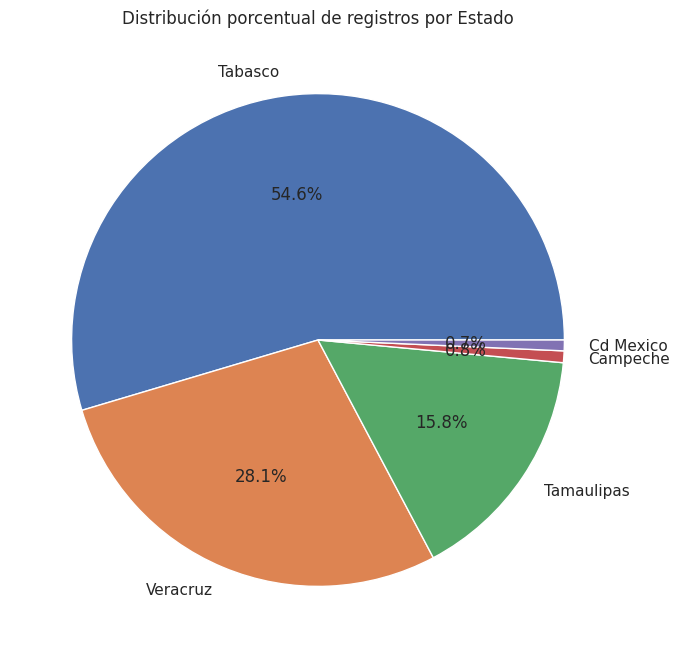

In [ ]:
frecuencia_estado.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribución porcentual de registros por Estado')
plt.ylabel('')
plt.show()


### Parte 3. Calidad de os datos

In [ ]:
# Valores faltantes por columna
missing_values = df.isnull().sum()
print("Valores faltantes:\n", missing_values)

# Revisión de registros duplicados
duplicados = df.duplicated().sum()
print("Número de registros duplicados:", duplicados)

# Opcionalmente, podemos revisar si existen errores en los datos (por ejemplo, errores de escritura)
# Se pueden buscar inconsistencias en las columnas categóricas:
print("Valores únicos por columna categórica:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Valores faltantes:
 Month                         0
Id Grupo Región               5
Grupo de Región           13542
Cliente                       0
Factura                       0
PO                        13542
GR                        16594
Id Región                     5
Serie                         0
No Economico              13550
Division                      0
BL                            0
SUB BL                    13542
CC                        13542
Identificador Vehículo        0
Vehículo                      0
Placa                         0
Num Tarjeta                   0
Num Serie                     0
Fecha Transacción         29352
Hora Transacción            414
No Comprobante                0
Id Mercancía                  0
Mercancía                     0
Km Ant Transacción          516
Km Transacción                3
Recorrido                   518
IVA %                         0
IEPS                          0
Importe Transacción           0
Comision            

In [ ]:
# No hay duplicados
#df.drop_duplicates(inplace=True)


## Otras exploraciones

In [ ]:
print("Dimensiones del dataset:", df.shape)


Dimensiones del dataset: (48769, 57)


In [ ]:
description = pd.DataFrame({
    'Nombre': df.columns,
    'Tipo de Dato': df.dtypes.values,
    'Valores Únicos': [df[col].nunique() for col in df.columns],
    'Valores Nulos': df.isnull().sum().values
})
print("\nDescripción de las variables:")
print(description)



Descripción de las variables:
                    Nombre Tipo de Dato  Valores Únicos  Valores Nulos
0                    Month       object              12              0
1          Id Grupo Región       object               8              5
2         Grupo de Región        object               2          13542
3                  Cliente       object              16              0
4                  Factura       object             229              0
5                       PO       object             209          13542
6                       GR       object             154          16594
7                Id Región       object              33              5
8                    Serie       object             663              0
9             No Economico       object             383          13550
10                Division       object               6              0
11                      BL       object              20              0
12                  SUB BL       object       

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
descriptive_stats = df[numeric_cols].describe().T

descriptive_stats['varianza'] = df[numeric_cols].var()
descriptive_stats['moda'] = df[numeric_cols].mode().iloc[0]
descriptive_stats['rango'] = descriptive_stats['max'] - descriptive_stats['min']

print("\nMedidas estadísticas de variables numéricas:")
print(descriptive_stats)



Medidas estadísticas de variables numéricas:
                       count          mean           std           min  \
Num Tarjeta          48769.0  6.363180e+15  3.547979e+06  6.363180e+15   
Km Ant Transacción   48253.0  1.422383e+05  4.498898e+05  0.000000e+00   
Km Transacción       48766.0  1.441313e+05  4.581357e+05  0.000000e+00   
Recorrido            48251.0  2.548682e+03  1.924149e+05 -9.750948e+06   
IVA %                48769.0  1.600000e+01  0.000000e+00  1.600000e+01   
IEPS                 48769.0  4.259380e+01  4.219804e+01  4.000000e-01   
Importe Transacción  48769.0  2.058047e+03  2.441281e+03  2.319000e+01   
Comision             48769.0  1.692477e+01  2.002193e+01  1.900000e-01   
Subtotal             48769.0  1.887797e+03  2.239771e+03  2.026000e+01   
Cantidad Mercancía   48769.0  9.252256e+01  1.034779e+02  1.000000e+00   
KG C02               48461.0  2.221797e+02  2.500152e+02  2.420000e+00   
TON C02              48687.0  2.211340e-01  2.498844e-01  0.000000

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())



Distribución de Month:
Month
Agosto        4436
Mayo          4291
Marzo         4239
Julio         4226
Enero         4151
Septiembre    4121
Octubre       4106
Noviembre     4081
Abril         3956
Junio         3913
Febrero       3626
Diciembre     3623
Name: count, dtype: int64

Distribución de Id Grupo Región:
Id Grupo Región
2               45713
DOWELL           1029
12                990
ene-00            497
DOWELL  MXEP      193
MIDRILLING        161
Dowell            155
SMITH              26
Name: count, dtype: int64

Distribución de Grupo de Región :
Grupo de Región 
MCA2      35035
Marine      192
Name: count, dtype: int64

Distribución de Cliente:
Cliente
02125-031    44219
02125-025     1236
MCA2           986
02125-022      844
02125-021      359
RPF            347
WEC            323
DAI            150
02125-026      145
PRS             70
MSP             58
0121-026        10
0121-022         9
0121-021         8
Marine           4
0121-025         1
Name: count, dty

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Función para convertir una cadena de hora (formato "HH:MM") a minutos del día
def time_to_minutes(t):
    try:
        # Si t no es una cadena, lo convertimos a entero y formateamos como "HH:MM"
        if not isinstance(t, str):
            t = str(int(t))
            if len(t) == 3:  # Por ejemplo, 900 se transforma a "09:00"
                t = '0' + t
            # Insertar el separador ":" entre horas y minutos
            t = t[:2] + ':' + t[2:]
        parts = t.split(':')
        hour = int(parts[0])
        minute = int(parts[1])
        return hour * 60 + minute
    except Exception as e:
        return np.nan

# Supongamos que ya tienes cargado tu DataFrame "df"
# Ejemplo: df = pd.read_csv('ruta/al/archivo.csv')

# Convertir "Hora Transacción" a minutos y crear la columna 'Hora_Min'
df['Hora_Min'] = df['Hora Transacción'].apply(time_to_minutes)

# Seleccionar el subconjunto de variables relevantes
cols = ['KG C02', 'Recorrido', 'Km Transacción', 'Hora_Min',
        'Importe Transacción', 'Subtotal', 'Rendimiento', 'Rendimiento Real',
        'Estado', 'Month']
df_sub = df[cols].copy()

# Convertir las variables que deben ser numéricas a float
numeric_cols = ['KG C02', 'Recorrido', 'Km Transacción', 'Hora_Min',
                'Importe Transacción', 'Subtotal', 'Rendimiento', 'Rendimiento Real']
for col in numeric_cols:
    df_sub[col] = pd.to_numeric(df_sub[col], errors='coerce')

# Eliminar filas que tengan valores nulos en las columnas numéricas importantes
df_sub.dropna(subset=numeric_cols, inplace=True)

# Convertir las variables categóricas en dummies:
# Para "Estado"
estado_dummies = pd.get_dummies(df_sub['Estado'], prefix='Estado', drop_first=True)
# Para "Month"
month_dummies = pd.get_dummies(df_sub['Month'], prefix='Month', drop_first=True)

# Eliminar las columnas originales de "Estado" y "Month"
df_sub.drop(['Estado', 'Month'], axis=1, inplace=True)
# Concatenar las dummies al DataFrame
df_sub = pd.concat([df_sub, estado_dummies, month_dummies], axis=1)

# Verificamos la estructura de los datos después del procesamiento
print("Estructura de datos después de procesar:")
print(df_sub.info())

# ---------------------------------------------------------------------------------
# SEPARACIÓN DE VARIABLES Y NORMALIZACIÓN
# ---------------------------------------------------------------------------------
# Definir la variable dependiente (y) e independientes (X)
y = df_sub['KG C02']
X = df_sub.drop('KG C02', axis=1)

# Identificar las columnas continuas (numéricas) excluyendo la variable dependiente
numeric_vars = ['Recorrido', 'Km Transacción', 'Hora_Min',
                'Importe Transacción', 'Subtotal', 'Rendimiento', 'Rendimiento Real']

# Normalizamos las variables continuas
scaler = StandardScaler()
X[numeric_vars] = scaler.fit_transform(X[numeric_vars])

# Convertir columnas booleanas a enteros por si acaso
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Agregar una constante para el modelo
X = sm.add_constant(X, has_constant='add')

# Verificar si después de estos pasos aún hay NaNs o infinitos
if np.any(np.isnan(X.values)) or np.any(np.isinf(X.values)):
    raise ValueError("Aún existen valores NaN o infinitos en X. Revisa el preprocesado de tus datos.")

# ---------------------------------------------------------------------------------
# MODELO OLS
# ---------------------------------------------------------------------------------
modelo_ols = sm.OLS(y, X).fit()
print("Resumen del modelo OLS:")
print(modelo_ols.summary())

# ---------------------------------------------------------------------------------
# MODELO ROBUSTO con RLM (HuberT)
# ---------------------------------------------------------------------------------
rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
print("\nResumen del modelo robusto (RLM):")
print(rlm_model.summary())


Estructura de datos después de procesar:
<class 'pandas.core.frame.DataFrame'>
Index: 47530 entries, 0 to 48768
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   KG C02               47530 non-null  float64
 1   Recorrido            47530 non-null  float64
 2   Km Transacción       47530 non-null  float64
 3   Hora_Min             47530 non-null  float64
 4   Importe Transacción  47530 non-null  float64
 5   Subtotal             47530 non-null  float64
 6   Rendimiento          47530 non-null  float64
 7   Rendimiento Real     47530 non-null  float64
 8   Estado_Cd Mexico     47530 non-null  bool   
 9   Estado_Tabasco       47530 non-null  bool   
 10  Estado_Tamaulipas    47530 non-null  bool   
 11  Estado_Veracruz      47530 non-null  bool   
 12  Month_Agosto         47530 non-null  bool   
 13  Month_Diciembre      47530 non-null  bool   
 14  Month_Enero          47530 non-null  bool   
 15  

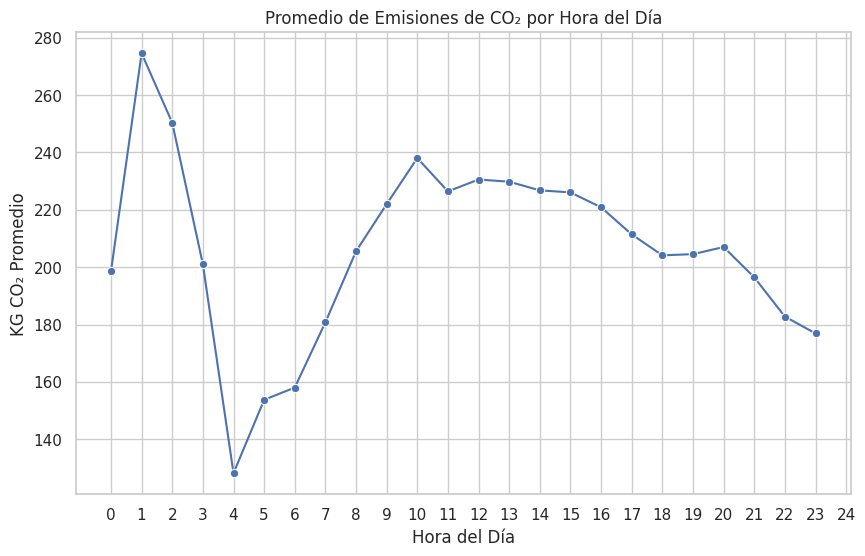

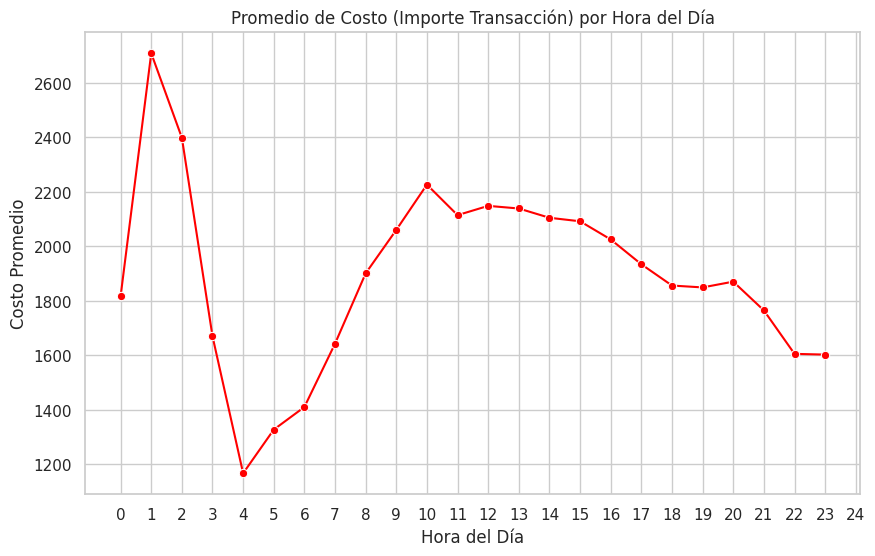

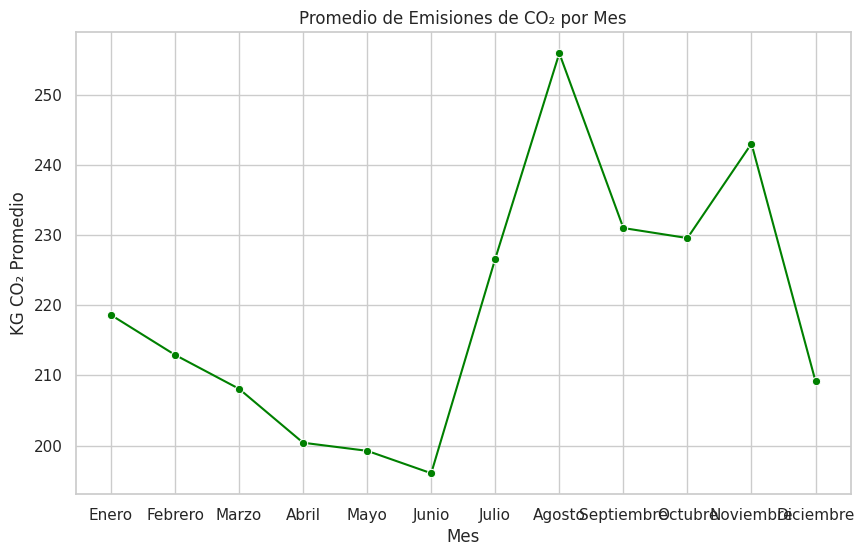

<ipython-input-131-f7348c119b38>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estado_avg.index, y=estado_avg.values, palette='viridis')


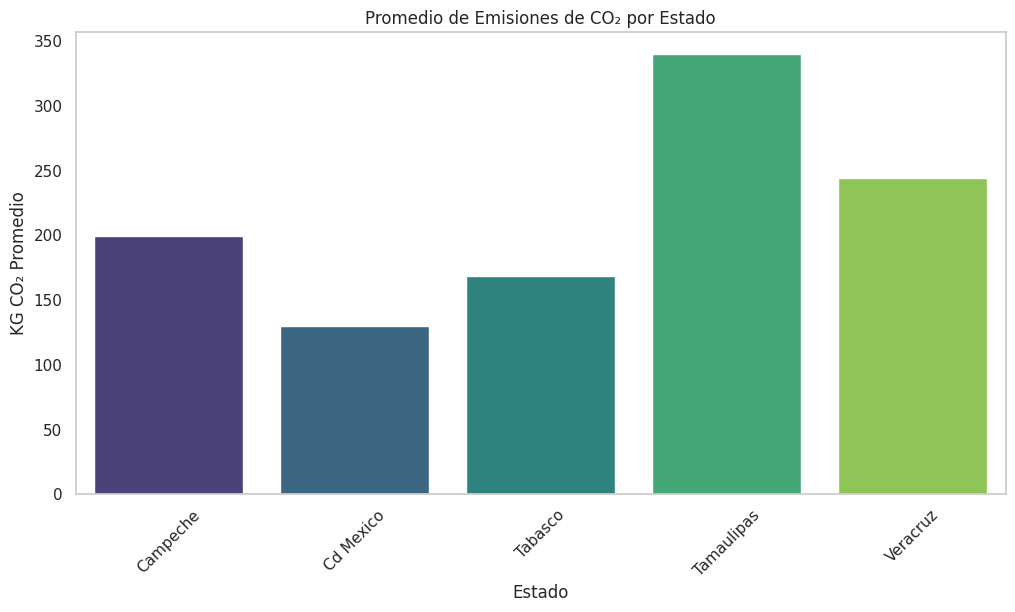

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Se asume que ya tienes cargado y preprocesado el DataFrame df y el df_sub
# df_sub contiene ya las variables numéricas y las dummies.
# Para las gráficas, recuperamos las columnas originales "Month" y "Estado" del df original.

# Agregamos las columnas originales a df_sub usando el índice (asegurándonos de que concuerden)
df_sub = df_sub.copy()  # Trabajamos sobre una copia para no modificar el df_sub procesado
df_sub['Month'] = df.loc[df_sub.index, 'Month']
df_sub['Estado'] = df.loc[df_sub.index, 'Estado']

# ------------------------------------------------------------------------------
# 1. Gráfica: Promedio de Emisiones de CO₂ (KG C02) a lo largo de las horas del día
# ------------------------------------------------------------------------------
# Creamos una columna "Hour" a partir de "Hora_Min" (suponiendo que Hora_Min está en minutos)
df_sub['Hour'] = (df_sub['Hora_Min'] // 60).astype(int)

# Agrupamos por hora y calculamos el promedio de emisiones
hourly_avg = df_sub.groupby('Hour')['KG C02'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.title('Promedio de Emisiones de CO₂ por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('KG CO₂ Promedio')
plt.xticks(np.arange(0, 25, 1))
plt.grid(True)
plt.show()

# ------------------------------------------------------------------------------
# 2. Gráfica: Promedio de Costos (Importe Transacción) a lo largo de las horas del día
# ------------------------------------------------------------------------------
# Agrupamos por hora para analizar el costo promedio
hourly_cost = df_sub.groupby('Hour')['Importe Transacción'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_cost.index, y=hourly_cost.values, marker='o', color='red')
plt.title('Promedio de Costo (Importe Transacción) por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Costo Promedio')
plt.xticks(np.arange(0, 25, 1))
plt.grid(True)
plt.show()

# ------------------------------------------------------------------------------
# 3. Gráfica: Serie Temporal de Emisiones de CO₂ por Mes
# ------------------------------------------------------------------------------
# Es importante ordenar los meses de forma cronológica.
# Se asume que los valores en "Month" son cadenas como "Enero", "Febrero", etc.
month_order = ['Enero','Febrero','Marzo','Abril','Mayo','Junio',
               'Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']

# Agrupamos por mes y obtenemos el promedio. Reindexamos según el orden deseado.
monthly_avg = df_sub.groupby('Month')['KG C02'].mean().reindex(month_order)

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='green')
plt.title('Promedio de Emisiones de CO₂ por Mes')
plt.xlabel('Mes')
plt.ylabel('KG CO₂ Promedio')
plt.grid(True)
plt.show()

# ------------------------------------------------------------------------------
# 4. Gráfica: Promedio de Emisiones de CO₂ por Estado
# ------------------------------------------------------------------------------
# Agrupamos por estado y calculamos el promedio de emisiones
estado_avg = df_sub.groupby('Estado')['KG C02'].mean().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=estado_avg.index, y=estado_avg.values, palette='viridis')
plt.title('Promedio de Emisiones de CO₂ por Estado')
plt.xlabel('Estado')
plt.ylabel('KG CO₂ Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Otras cosas (probando)

a) Gráfico de línea de emisiones promedio a lo largo de las horas, para cada estado.

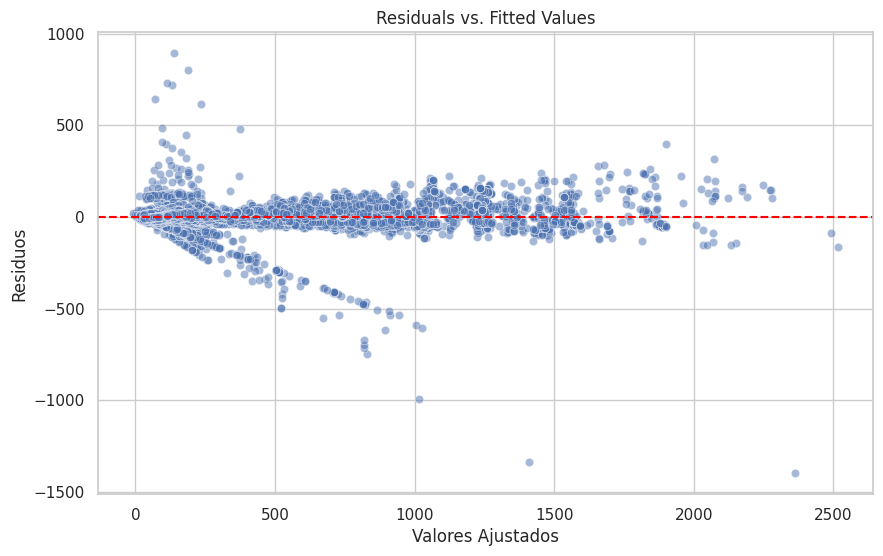

<Figure size 800x800 with 0 Axes>

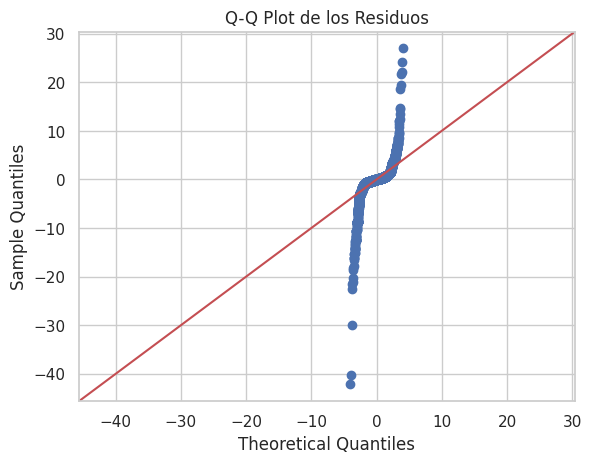

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Ajustamos nuevamente el modelo OLS si es necesario (asumiendo X e y ya preprocesados)
modelo_ols = sm.OLS(y, X).fit()
residuos = modelo_ols.resid
valores_ajustados = modelo_ols.fittedvalues

# a) Residuales vs Valores Ajustados
plt.figure(figsize=(10,6))
sns.scatterplot(x=valores_ajustados, y=residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

# b) Q-Q Plot
plt.figure(figsize=(8,8))
sm.qqplot(residuos, line='45', fit=True)
plt.title('Q-Q Plot de los Residuos')
plt.show()


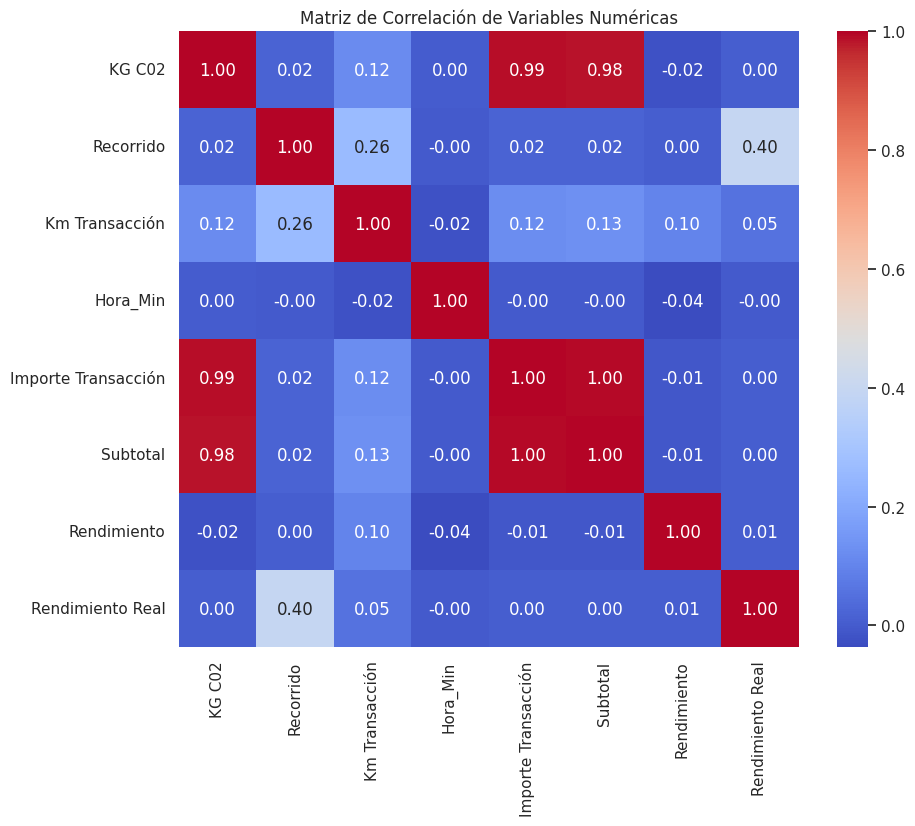

In [ ]:
plt.figure(figsize=(10,8))
numeric_features = ['KG C02', 'Recorrido', 'Km Transacción', 'Hora_Min',
                    'Importe Transacción', 'Subtotal', 'Rendimiento', 'Rendimiento Real']
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


In [ ]:
!pip install kmapper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 4.3 MB/s eta 0:00:00


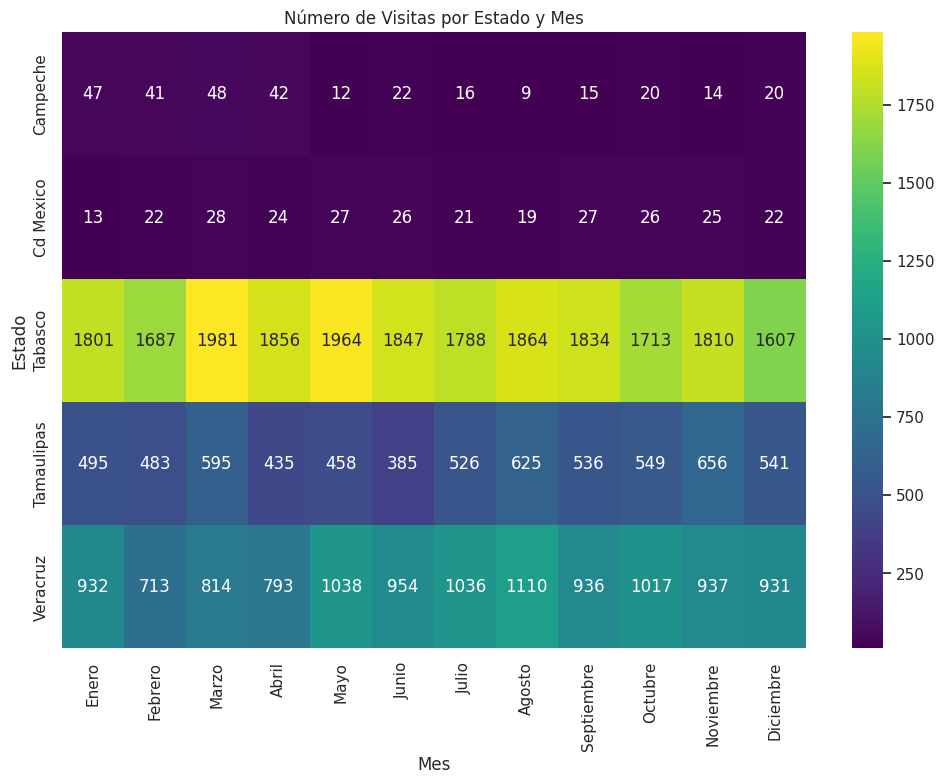

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df y tiene las columnas "Estado" y "Month".
# Primero, agrupamos los datos para contar las ocurrencias (visitas) por Estado y por Mes.
visit_counts = df.groupby(['Estado', 'Month']).size().reset_index(name='Counts')

# Creamos una tabla pivote para obtener la matriz Estado x Mes
heatmap_data = visit_counts.pivot(index='Estado', columns='Month', values='Counts')

# Si deseas un orden específico para los meses, puedes definirlo:
month_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
# Reordenar las columnas si ya están en el heatmap
heatmap_data = heatmap_data.reindex(columns=month_order)

# Opcionalmente, reemplazar NaN por 0 en caso de combinaciones sin visitas
heatmap_data = heatmap_data.fillna(0)

# Crear el heatmap con seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='viridis')
plt.title('Número de Visitas por Estado y Mes')
plt.xlabel('Mes')
plt.ylabel('Estado')
plt.show()
